# LET'S GROW MORE

# AUTHOR : ONKAR SAUDAGAR

## TASK 3: Prediction using Decision Tree  Algorithm

#### Create the Decision Tree classifier and visualize it graphically.

###### Steps used in this notebook:-

        1. Import libraries and dataset
        2. Familiarzing with data
        3. Making the data continuous
        4. Splitting the data
        5. Train model
        6. Visualize the decision tree
        

### 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Familiarzing with the data

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 3. Making the data continuous

In [9]:
df.loc[df['Species'] == 'Iris-setosa' , 'Species'] = 0
df.loc[df['Species'] == 'Iris-versicolor', 'Species'] = 1
df.loc[df['Species'] == 'Iris-virginica', 'Species'] = 2

In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### 4. Splitting the data

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [12]:
x.shape

(150, 5)

In [13]:
y.shape

(150,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=.20, random_state=0)

In [16]:
X_train.shape

(120, 5)

In [17]:
X_test.shape

(30, 5)

### 5. Train model

In [18]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
from sklearn import metrics
import sklearn

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print('Accuracy: ' ,metrics.accuracy_score(y_pred, Y_test))

Accuracy:  0.9666666666666667


In [23]:
sklearn.metrics.confusion_matrix(Y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [24]:
print(sklearn.metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [25]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### 6. Visualize the decision tree

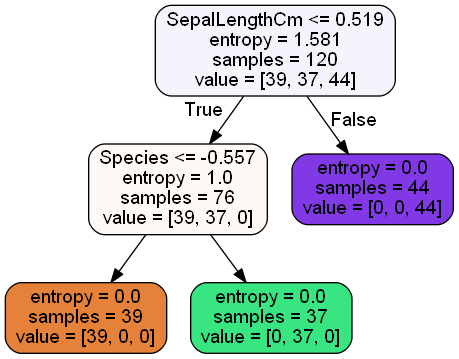

In [26]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Admission.png')
Image(graph.create_png())